In [5]:
import sklearn as sk
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

In [6]:
#list of the csv file

path = "G:\\PROJECTS\\BUSINESS-INTELLIGENCE-SYSTEM_1\\datasets_2\\" #path of the CSV file
files_csv = listdir(path)
files_csv

['aisles.csv',
 'departments.csv',
 'new_order_prior.csv',
 'orders.csv',
 'order_products__prior.csv',
 'products.csv',
 'sample_submission.csv',
 'test.py']

In [190]:
aisles = pd.read_csv(path+files_csv[0])
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [209]:
aisles.shape

(134, 3)

In [204]:
departments = pd.read_csv(path+files_csv[1])
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [208]:
departments.shape

(21, 2)

In [205]:
orders = pd.read_csv(path+files_csv[3])
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [261]:
days = orders["days_since_prior_order"].value_counts().sort_index()

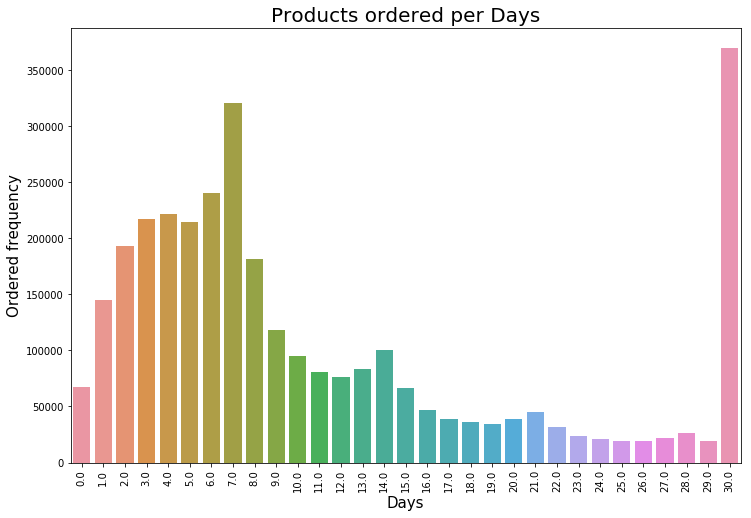

In [260]:
plt.figure(figsize=(12,8))
sns.barplot(days.index, days.values)
plt.xticks(rotation="vertical")
plt.title("Products ordered per Days", fontsize=20)
plt.xlabel("Days", fontsize=15)
plt.ylabel("Ordered frequency", fontsize=15)
plt.show()

In [262]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [316]:
per_hour = orders["order_hour_of_day"].value_counts()
per_hour.index = per_hour.index + 1
per_hour = per_hour[per_hour.index.sort_values()]

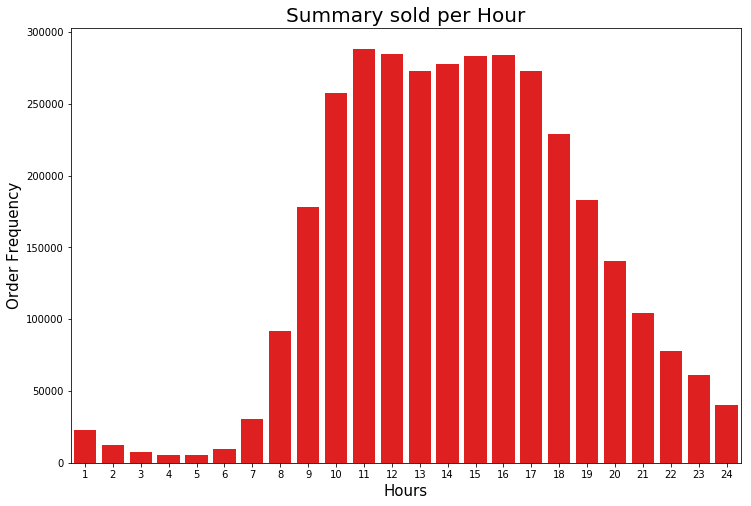

In [317]:
plt.figure(figsize=(12,8))
sns.barplot(per_hour.index, per_hour.values, color="red")
plt.title("Summary sold per Hour", fontsize=20)
plt.xlabel("Hours", fontsize=15)
plt.ylabel("Order Frequency", fontsize=15)
plt.show()

In [321]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [359]:
users_id = orders["user_id"].value_counts()
user = users_id.value_counts()
user = user[np.arange(100)+1]


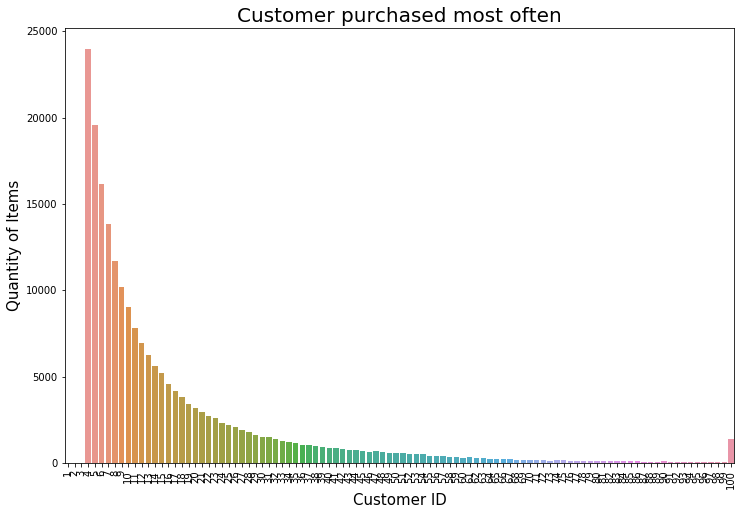

In [361]:
plt.figure(figsize=(12,8))
sns.barplot(user.index, user.values)
plt.xticks(rotation="vertical")
plt.xlabel("Customer ID", fontsize=15)
plt.ylabel("Quantity of Items", fontsize=15)
plt.title("Customer purchased most often", fontsize=20)
plt.show()

In [362]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [409]:
one_week = orders["order_dow"].value_counts()
one_week.index = one_week.index + 1
one_week = one_week[one_week.index.sort_values()]

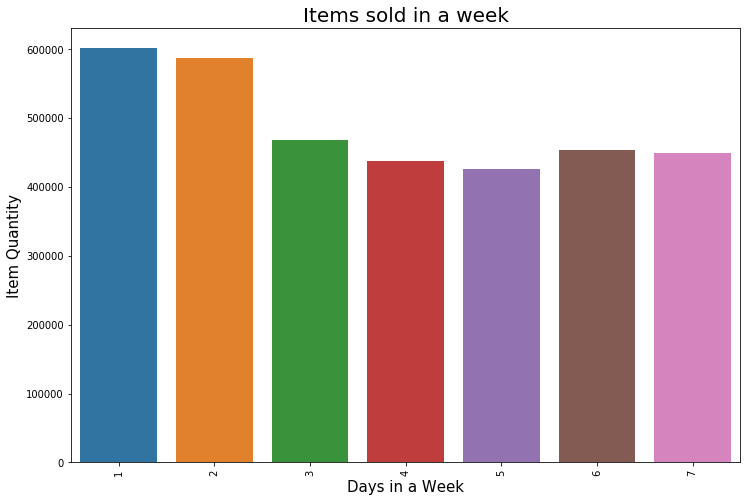

In [411]:
plt.figure(figsize=(12,8))
sns.barplot(one_week.index, one_week.values)
plt.xticks(rotation="vertical")
plt.xlabel("Days in a Week", fontsize=15)
plt.ylabel("Item Quantity", fontsize=15)
plt.title("Items sold in a week", fontsize=20)
plt.show()

In [206]:
order_products__prior = pd.read_csv(path+files_csv[4])
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products__prior["product_id"].value_counts().shape

In [207]:
products = pd.read_csv(path+files_csv[5])
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
## Products more profitable
order_products__prior = pd.merge(order_products__prior, products, on="product_id", how="left")
order_products__prior = order_products__prior["product_name"].value_counts().reset_index().head(20)

In [16]:
srs = order_products__prior.head(20)

In [17]:
srs.columns = ["product_name","frequency_counts"]
srs

,product_name,frequency_counts
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


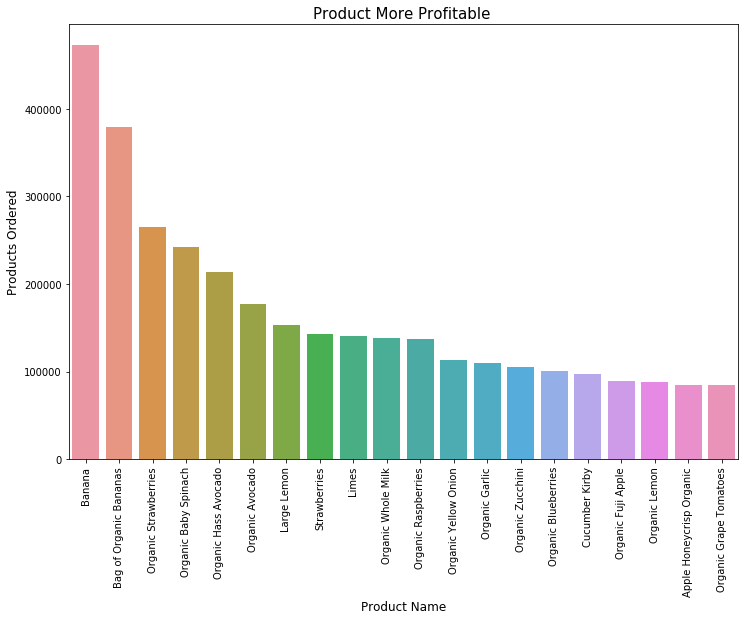

In [192]:
## Products more profitable
plt.figure(figsize=(12,8))
sns.barplot(srs["product_name"], srs["frequency_counts"])
plt.xticks(rotation="vertical")
plt.title("Product More Profitable ", fontsize=15)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Products Ordered", fontsize=12)
plt.show()


In [193]:
#costumer purchased most often
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [194]:
products.head()

,aisle_id,product_id,product_name,department_id
0,61,1,Chocolate Sandwich Cookies,19
1,104,2,All-Seasons Salt,13
2,94,3,Robust Golden Unsweetened Oolong Tea,7
3,38,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,1
4,5,5,Green Chile Anytime Sauce,13


In [195]:
pr = products["aisle_id"].value_counts()
pr.sort_index().head()

1    146
2    271
3    832
4    543
5    409
Name: aisle_id, dtype: int64

In [196]:
aisles.index = np.arange(1,len(aisles)+1)
aisles["frequency_count"] = pr
aisles.head()

,aisle_id,aisle,frequency_count
1,1,prepared soups salads,146
2,2,specialty cheeses,271
3,3,energy granola bars,832
4,4,instant foods,543
5,5,marinades meat preparation,409


In [197]:
aisles = aisles.sort_values("frequency_count",ascending=False)
aisles.head()

,aisle_id,aisle,frequency_count
100,100,missing,1258
45,45,candy chocolate,1246
37,37,ice cream ice,1091
47,47,vitamins supplements,1038
120,120,yogurt,1026


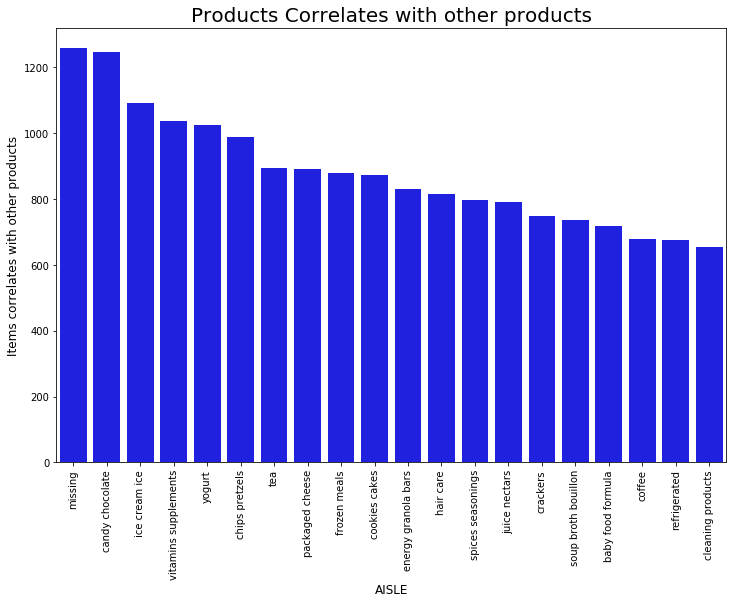

In [198]:
plt.figure(figsize=(12,8))
sns.barplot(aisles["aisle"].head(20), aisles["frequency_count"].head(20), color="blue")
plt.xticks(rotation="vertical")
plt.title("Products Correlates with other products", fontsize=20)
plt.xlabel("AISLE", fontsize=12)
plt.ylabel("Items correlates with other products", fontsize=12)
plt.show()

In [203]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
